In [1]:
import numpy as np
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import cx_Oracle
from IPython.display import display
%matplotlib inline

#import warnings
#warnings.filterwarnings('ignore')

### TIER clasification

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
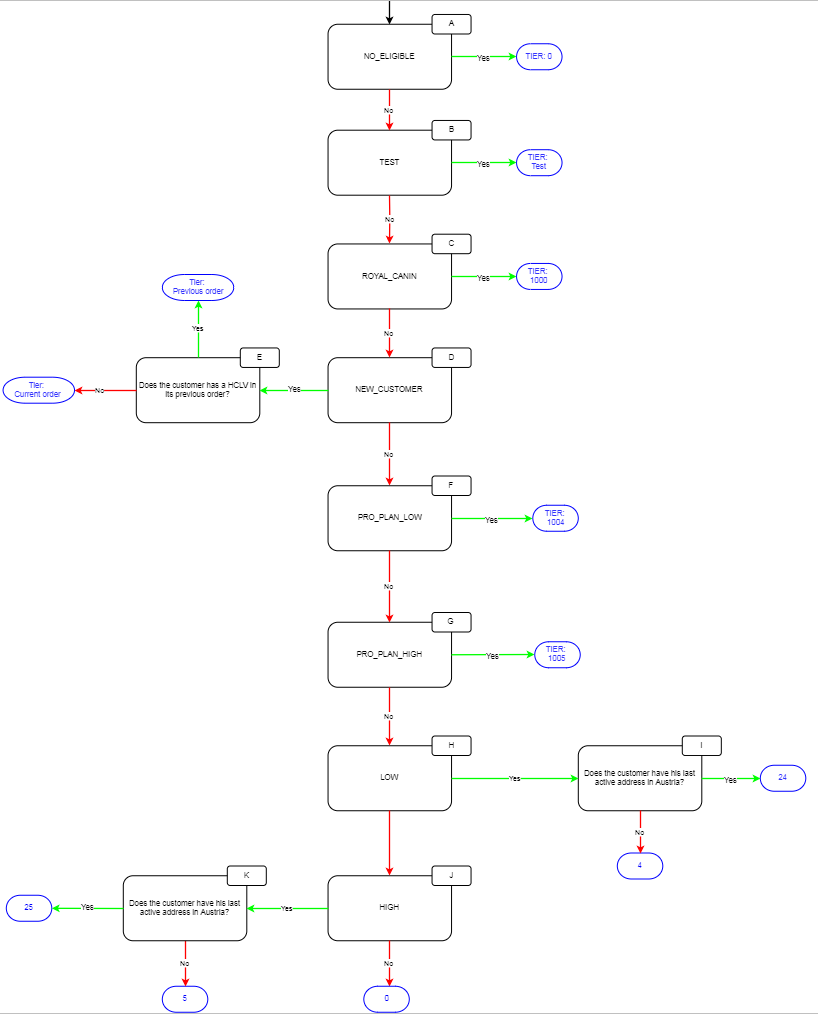

### Invitation type - BOX clasification

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
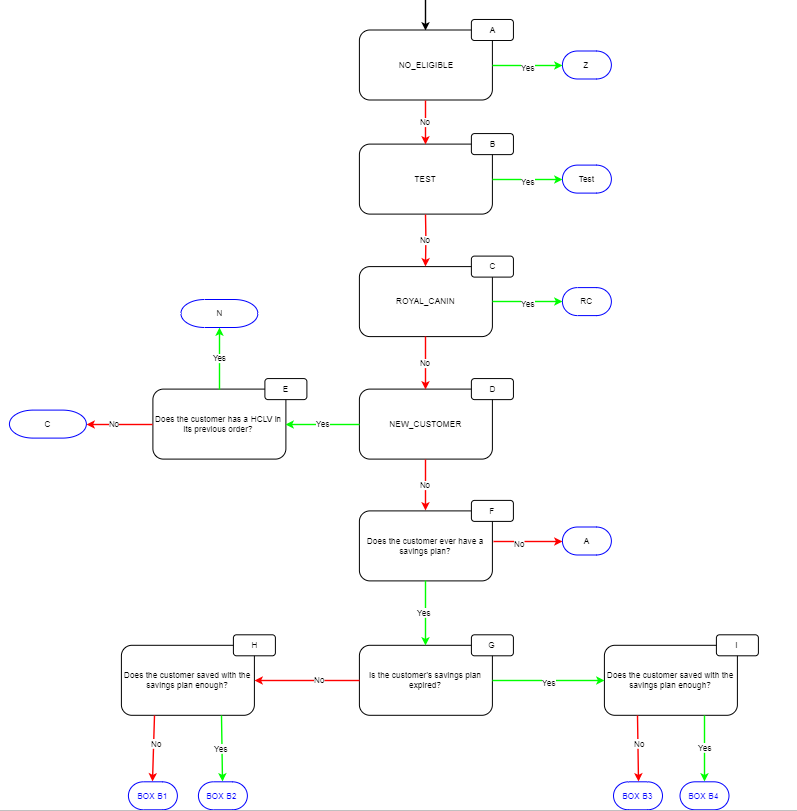

In [2]:
data = pd.read_csv('comparison_eligibilities.dsv', sep=';')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
OLD_TIER    329 non-null float64
OLD_BOX     329 non-null object
NEW_TIER    305 non-null float64
NEW_BOX     305 non-null object
AMOUNT      332 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 13.0+ KB


In [4]:
data

,OLD_TIER,OLD_BOX,NEW_TIER,NEW_BOX,AMOUNT
0,5.0,A,4.0,A,88557
1,0.0,Z,0.0,Z,3211945
2,4.0,B4,NaN,NaN,82596
3,4.0,B3,0.0,Z,54738
4,4.0,A,0.0,Z,393193
5,4.0,A,6.0,N,109372
6,6.0,N,NaN,NaN,87045
7,1004.0,B1,0.0,Z,164
8,5.0,B3,4.0,A,2052
9,24.0,A,0.0,Z,5999


In [5]:
#Exclude rows with NaN values (null)
data = data[~data.apply(lambda x: x.isnull().any(), axis=1)]

In [6]:
data['AMOUNT'].sum()

9237799

In [7]:
#Not eligible in OLD elig
data[data['OLD_TIER'] == 0]['AMOUNT'].sum()

3387553

In [8]:
#Not segmented in OLD elig
data[data['OLD_TIER'].isnull()]['AMOUNT'].sum()

0

In [9]:
# % Not eligible in OLD elig
np.round(data[(data['OLD_TIER'] == 0) | (data['OLD_TIER'].isnull())]['AMOUNT'].sum() / data['AMOUNT'].sum() * 100, 2)

36.67

In [10]:
#Not eligible in NEW elig
data[data['NEW_TIER'] == 0]['AMOUNT'].sum()

5993076

In [11]:
#Not segmented in NEW elig
data[data['NEW_TIER'].isnull()]['AMOUNT'].sum()

0

In [12]:
# % Not eligible in NEW elig
np.round(data[(data['NEW_TIER'] == 0) | (data['NEW_TIER'].isnull())]['AMOUNT'].sum() / data['AMOUNT'].sum() * 100, 2)

64.88

In [13]:
crosstab = data.fillna('not_segmented').groupby(['OLD_TIER', 'NEW_TIER'])['AMOUNT'].sum().unstack()

In [14]:
crosstab_rel = crosstab.apply(lambda x:x/x.sum() * 100, axis=1).fillna(0).round(2)

In [15]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [16]:
# Relative values of transition between old and new eligibility
crosstab_rel.style.apply(highlight_max, axis=1)

NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0
OLD_TIER,,,,,,,,,
0.0,94.82,2.86,0.23,1.82,0.1,0.01,0.11,0.03,0.02
4.0,25.81,62.13,3.26,8.19,0.01,0,0.35,0.11,0.14
5.0,27.35,9.25,51.76,11.45,0,0.02,0.07,0.01,0.09
6.0,69.63,0.06,0.03,30.27,0,0,0,0,0
24.0,21.61,0.32,0.03,13.69,59.96,4.39,0,0,0
25.0,16.23,0.07,0.47,19.16,7.25,56.83,0,0,0
1000.0,5.83,5.78,0.81,27.83,0,0,59.75,0,0
1004.0,39.52,3.64,0.01,0.64,0,0,0,35.73,20.47
1005.0,27.2,1.5,2.25,1.7,0,0,0,16.92,50.42


In [17]:
crosstab['SUM_OLD_TIER'] = crosstab.apply(np.sum, axis=1)

In [18]:
crosstab.loc['SUM_NEW_TIER'] = crosstab.apply(np.sum, axis=0)

In [19]:
# Absolute values of transition between old and new eligibility
crosstab.fillna(0).astype(int)

NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0,SUM_OLD_TIER
OLD_TIER,,,,,,,,,,
0.0,3211945,96825,7885,61615,3394,369,3650,1031,839,3387553
4.0,491632,1183378,62121,156050,285,10,6619,2066,2600,1904761
5.0,270031,91276,510991,113080,14,221,681,98,904,987296
6.0,2003052,1756,896,870890,15,10,22,15,5,2876661
24.0,8021,118,11,5079,22254,1628,1,0,0,37112
25.0,2266,10,65,2675,1012,7936,0,0,0,13964
1000.0,933,926,130,4458,0,0,9570,0,0,16017
1004.0,4074,375,1,66,0,0,0,3684,2110,10310
1005.0,1122,62,93,70,0,0,0,698,2080,4125
